# South German Credit Analysis

## 1. Importacion de datos

In [236]:
# cargar librerias neesarias

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set()
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pandas.plotting import parallel_coordinates

In [237]:
# cargar base de datos

df = pd.read_csv('SouthGermanCredit.asc', delimiter=' ')
df.head()

laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0         1        18      4     2   1049         1        2     4       2   
1         1         9      4     0   2799         1        3     2       3   
2         2        12      2     9    841         2        4     2       2   
3         1        12      4     0   2122         1        3     3       3   
4         1        12      4     0   2171         1        3     4       3   

   buerge  ...  verm  alter  weitkred  wohn  bishkred  beruf  pers  telef  \
0       1  ...     2     21         3     1         1      3     2      1   
1       1  ...     1     36         3     1         2      3     1      1   
2       1  ...     1     23         3     1         1      2     2      1   
3       1  ...     1     39         3     1         2      2     1      1   
4       1  ...     2     38         1     2         2      2     2      1   

   gastarb  kredit  
0        2       1  
1        2       1  
2        2       1  
3        1       1  
4        1       1  

[5 rows x 21 columns]

## 2. Transformacion de datos

### 2.1 Exploracion de datos

In [238]:
df.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

In [239]:
df.shape

(1000, 21)

#### *Renombrar columnas a español*

In [240]:
# renombrar de nombre de variables
df = df.rename(columns={
    'laufkont': 'estado_de_cuenta',
    'laufzeit': 'duracion',
    'moral': 'historial_crediticio',
    'verw': 'proposito',
    'hoehe': 'monto',
    'sparkont': 'ahorros',
    'beszeit': 'duracion_de_empleo',
    'rate': 'tasa_de_la_cuota',
    'famges': 'estado_civil_y_sexo',
    'buerge': 'otros_deudores',
    'wohnzeit': 'residencia_actual',
    'verm': 'propiedad',
    'alter': 'edad',
    'weitkred': 'otros_planes_de_cuotas',
    'wohn': 'vivienda',
    'bishkred': 'numero_de_creditos',
    'beruf': 'empleo',
    'pers': 'personas_a_cargo',
    'telef': 'telefono',
    'gastarb': 'trabajador_extranjero',
    'kredit': 'riesgo_de_credito'
})
df.head()

estado_de_cuenta  duracion  historial_crediticio  proposito  monto  \
0                 1        18                     4          2   1049   
1                 1         9                     4          0   2799   
2                 2        12                     2          9    841   
3                 1        12                     4          0   2122   
4                 1        12                     4          0   2171   

   ahorros  duracion_de_empleo  tasa_de_la_cuota  estado_civil_y_sexo  \
0        1                   2                 4                    2   
1        1                   3                 2                    3   
2        2                   4                 2                    2   
3        1                   3                 3                    3   
4        1                   3                 4                    3   

   otros_deudores  ...  propiedad  edad  otros_planes_de_cuotas  vivienda  \
0               1  ...          2    21                       3         1   
1               1  ...          1    36                       3         1   
2               1  ...          1    23                       3         1   
3               1  ...          1    39                       3         1   
4               1  ...          2    38                       1         2   

   numero_de_creditos  empleo  personas_a_cargo  telefono  \
0                   1       3                 2         1   
1                   2       3                 1         1   
2                   1       2                 2         1   
3                   2       2                 1         1   
4                   2       2                 2         1   

   trabajador_extranjero  riesgo_de_credito  
0                      2                  1  
1                      2                  1  
2                      2                  1  
3                      1                  1  
4                      1                  1  

[5 rows x 21 columns]

In [241]:
df.describe()

estado_de_cuenta     duracion  historial_crediticio    proposito  \
count       1000.000000  1000.000000            1000.00000  1000.000000   
mean           2.577000    20.903000               2.54500     2.828000   
std            1.257638    12.058814               1.08312     2.744439   
min            1.000000     4.000000               0.00000     0.000000   
25%            1.000000    12.000000               2.00000     1.000000   
50%            2.000000    18.000000               2.00000     2.000000   
75%            4.000000    24.000000               4.00000     3.000000   
max            4.000000    72.000000               4.00000    10.000000   

             monto      ahorros  duracion_de_empleo  tasa_de_la_cuota  \
count   1000.00000  1000.000000         1000.000000       1000.000000   
mean    3271.24800     2.105000            3.384000          2.973000   
std     2822.75176     1.580023            1.208306          1.118715   
min      250.00000     1.000000            1.000000          1.000000   
25%     1365.50000     1.000000            3.000000          2.000000   
50%     2319.50000     1.000000            3.000000          3.000000   
75%     3972.25000     3.000000            5.000000          4.000000   
max    18424.00000     5.000000            5.000000          4.000000   

       estado_civil_y_sexo  otros_deudores  ...    propiedad        edad  \
count           1000.00000     1000.000000  ...  1000.000000  1000.00000   
mean               2.68200        1.145000  ...     2.358000    35.54200   
std                0.70808        0.477706  ...     1.050209    11.35267   
min                1.00000        1.000000  ...     1.000000    19.00000   
25%                2.00000        1.000000  ...     1.000000    27.00000   
50%                3.00000        1.000000  ...     2.000000    33.00000   
75%                3.00000        1.000000  ...     3.000000    42.00000   
max                4.00000        3.000000  ...     4.000000    75.00000   

       otros_planes_de_cuotas     vivienda  numero_de_creditos       empleo  \
count             1000.000000  1000.000000         1000.000000  1000.000000   
mean                 2.675000     1.928000            1.407000     2.904000   
std                  0.705601     0.530186            0.577654     0.653614   
min                  1.000000     1.000000            1.000000     1.000000   
25%                  3.000000     2.000000            1.000000     3.000000   
50%                  3.000000     2.000000            1.000000     3.000000   
75%                  3.000000     2.000000            2.000000     3.000000   
max                  3.000000     3.000000            4.000000     4.000000   

       personas_a_cargo     telefono  trabajador_extranjero  riesgo_de_credito  
count       1000.000000  1000.000000            1000.000000        1000.000000  
mean           1.845000     1.404000               1.963000           0.700000  
std            0.362086     0.490943               0.188856           0.458487  
min            1.000000     1.000000               1.000000           0.000000  
25%            2.000000     1.000000               2.000000           0.000000  
50%            2.000000     1.000000               2.000000           1.000000  
75%            2.000000     2.000000               2.000000           1.000000  
max            2.000000     2.000000               2.000000           1.000000  

[8 rows x 21 columns]

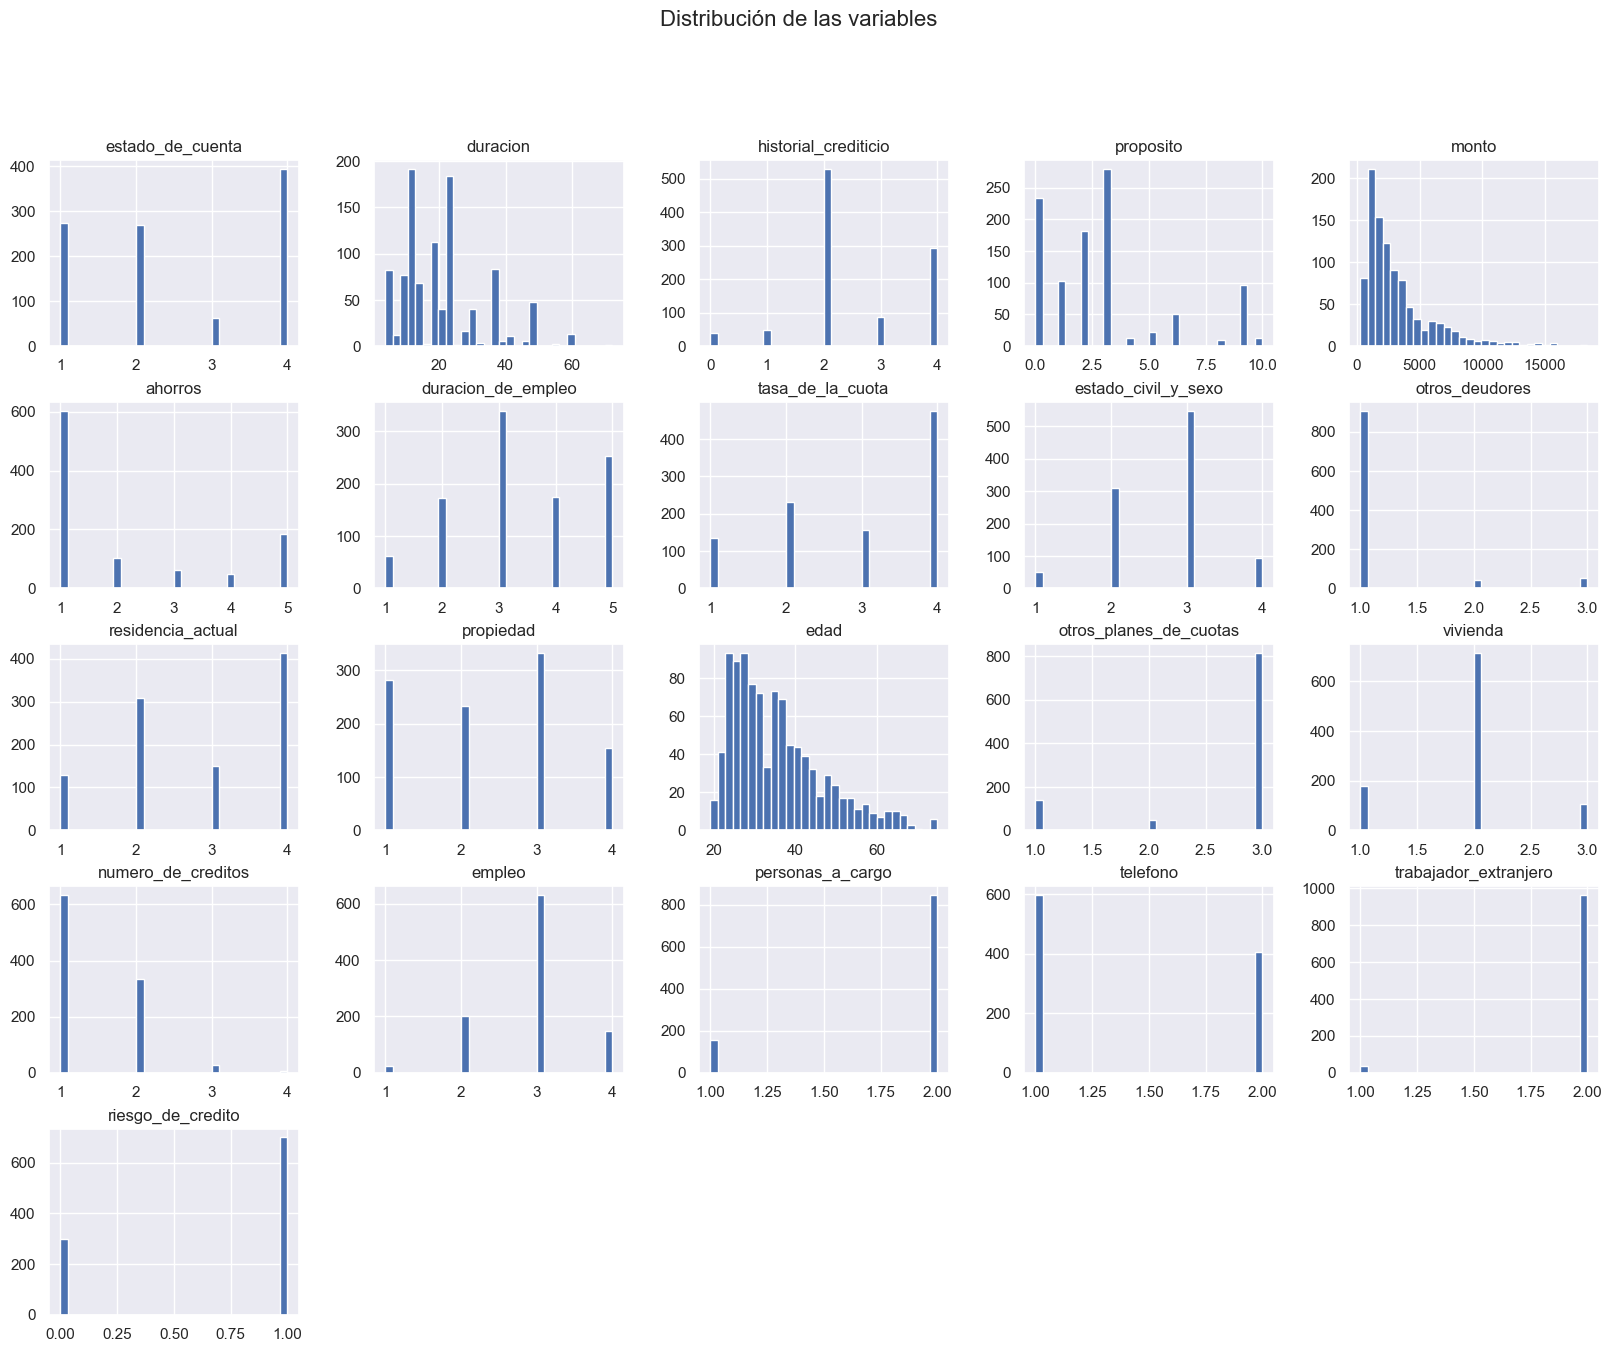

In [242]:
# graficos de barras
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribución de las variables', fontsize=16)
plt.show()

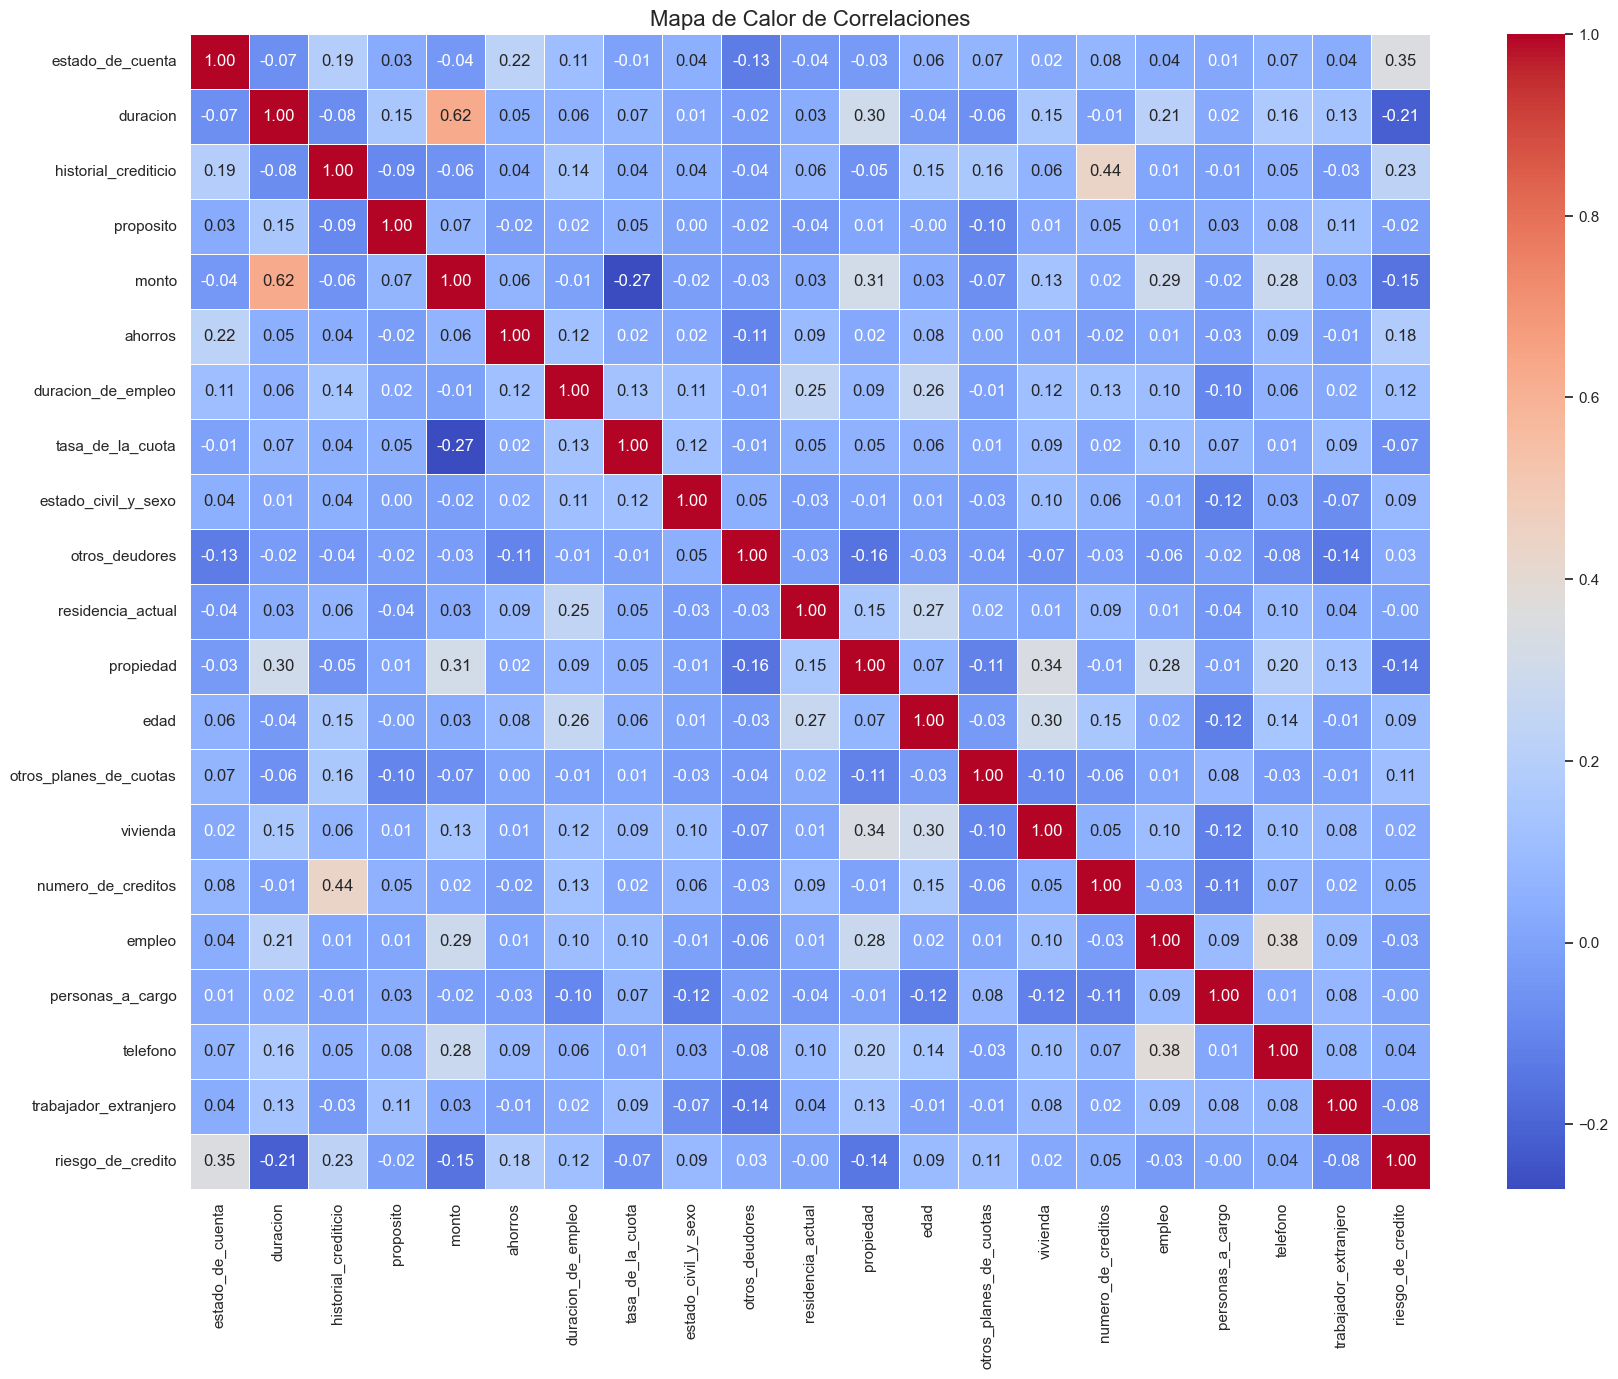

In [243]:
# mapa de correlaciones
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones', fontsize=16)
plt.show()

#### *Nulos y outliers*

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   estado_de_cuenta        1000 non-null   int64
 1   duracion                1000 non-null   int64
 2   historial_crediticio    1000 non-null   int64
 3   proposito               1000 non-null   int64
 4   monto                   1000 non-null   int64
 5   ahorros                 1000 non-null   int64
 6   duracion_de_empleo      1000 non-null   int64
 7   tasa_de_la_cuota        1000 non-null   int64
 8   estado_civil_y_sexo     1000 non-null   int64
 9   otros_deudores          1000 non-null   int64
 10  residencia_actual       1000 non-null   int64
 11  propiedad               1000 non-null   int64
 12  edad                    1000 non-null   int64
 13  otros_planes_de_cuotas  1000 non-null   int64
 14  vivienda                1000 non-null   int64
 15  numero_de_creditos    

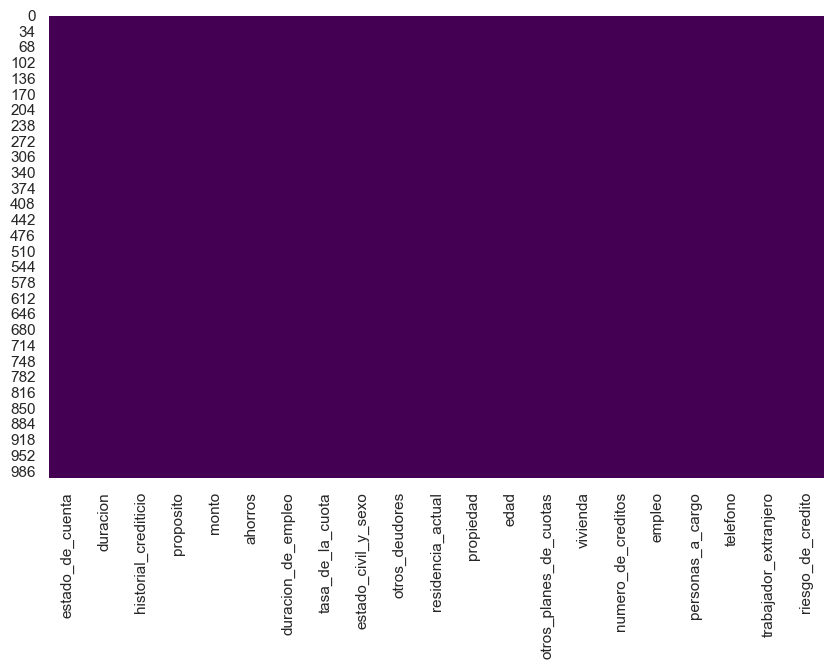

In [245]:
# ver datos faltantes

df.isnull().sum()

# ver mapa de calor con datos faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [246]:
# Valores unicos en cada variable
valores_unicos = {}

for col in df.columns:
    valores_unicos[col] = df[col].unique()

# Mostrar los valores únicos de cada columna
for col, unicos in valores_unicos.items():
    print(f"Columna: {col}")
    print(unicos)
    print("---------")

Columna: estado_de_cuenta
[1 2 4 3]
---------
Columna: duracion
[18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
---------
Columna: historial_crediticio
[4 2 3 0 1]
---------
Columna: proposito
[ 2  0  9  3  1 10  5  4  6  8]
---------
Columna: monto
[ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  1344  1237  3077  2284  1567  2032  2745  1867
  2299   929  3399  2030  3275  1940  1602  1979  2022  3342  5866  2360
  1520  3651  2346  4454   666  1965  1995  2991  4221  1364  6361  4526
  3573  4455  2136  5954  3777   806  4712  7432  1851  1393  1412  1473
  1533  2012  3959   428  2366   763  3

In [247]:
# revisar outliers
columnas_a_revisar = ['monto', 'edad', 'duracion']
df_seleccionado = df[columnas_a_revisar]

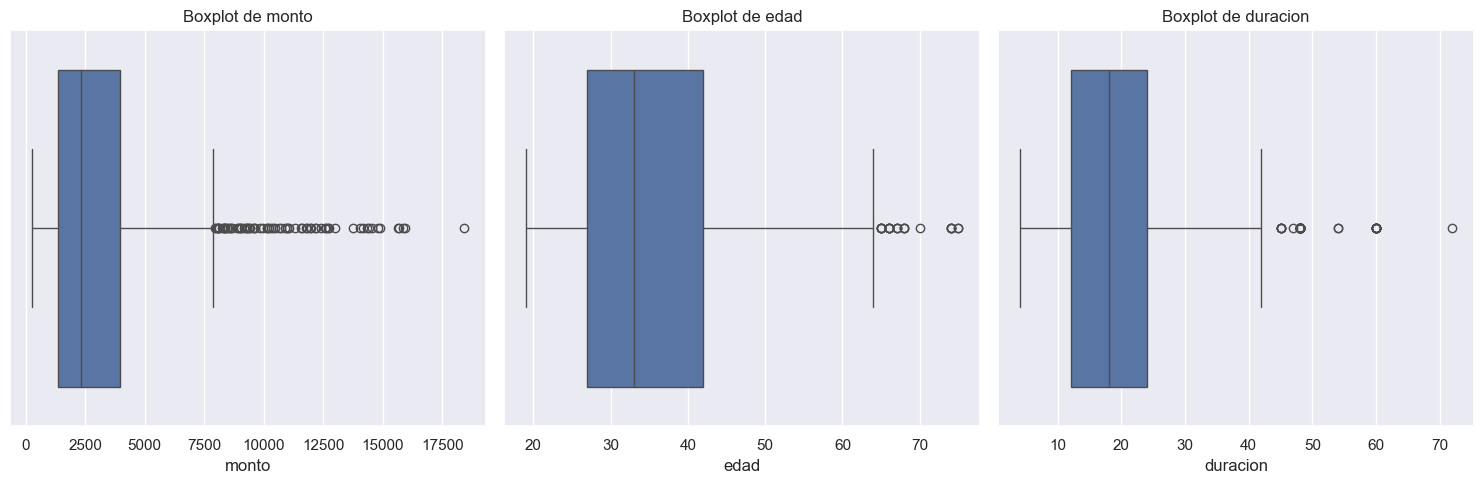

In [248]:
plt.figure(figsize=(15, 5))

for i, columna in enumerate(columnas_a_revisar):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_seleccionado[columna])
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()

In [249]:
# identificacion de outliers
def identificar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior, df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

# Aplicar a cada columna seleccionada
for columna in columnas_a_revisar:
    limite_inferior, limite_superior, outliers = identificar_outliers(df, columna)
    print(f'Columna: {columna}')
    print(f'  Límite inferior para outliers: {limite_inferior}')
    print(f'  Límite superior para outliers: {limite_superior}')
    print(f'  Número de outliers: {len(outliers)}')
    print()

Columna: monto
  Límite inferior para outliers: -2544.625
  Límite superior para outliers: 7882.375
  Número de outliers: 72

Columna: edad
  Límite inferior para outliers: 4.5
  Límite superior para outliers: 64.5
  Número de outliers: 23

Columna: duracion
  Límite inferior para outliers: -6.0
  Límite superior para outliers: 42.0
  Número de outliers: 70



### 2.2 Cambio de formato de datos previo al ingreso en el modelo

In [250]:
# Y las columnas que deseas transformar están en `scale_columns`
transformation_columns = ['duracion', 'monto', 'edad']

# Aplicar la transformación por raíz cuadrada
for col in transformation_columns:
    df[col] = np.sqrt(df[col])

# Si deseas ver el resultado
print(df[transformation_columns].head())

   duracion      monto      edad
0  4.242641  32.388269  4.582576
1  3.000000  52.905576  6.000000
2  3.464102  29.000000  4.795832
3  3.464102  46.065171  6.244998
4  3.464102  46.593991  6.164414


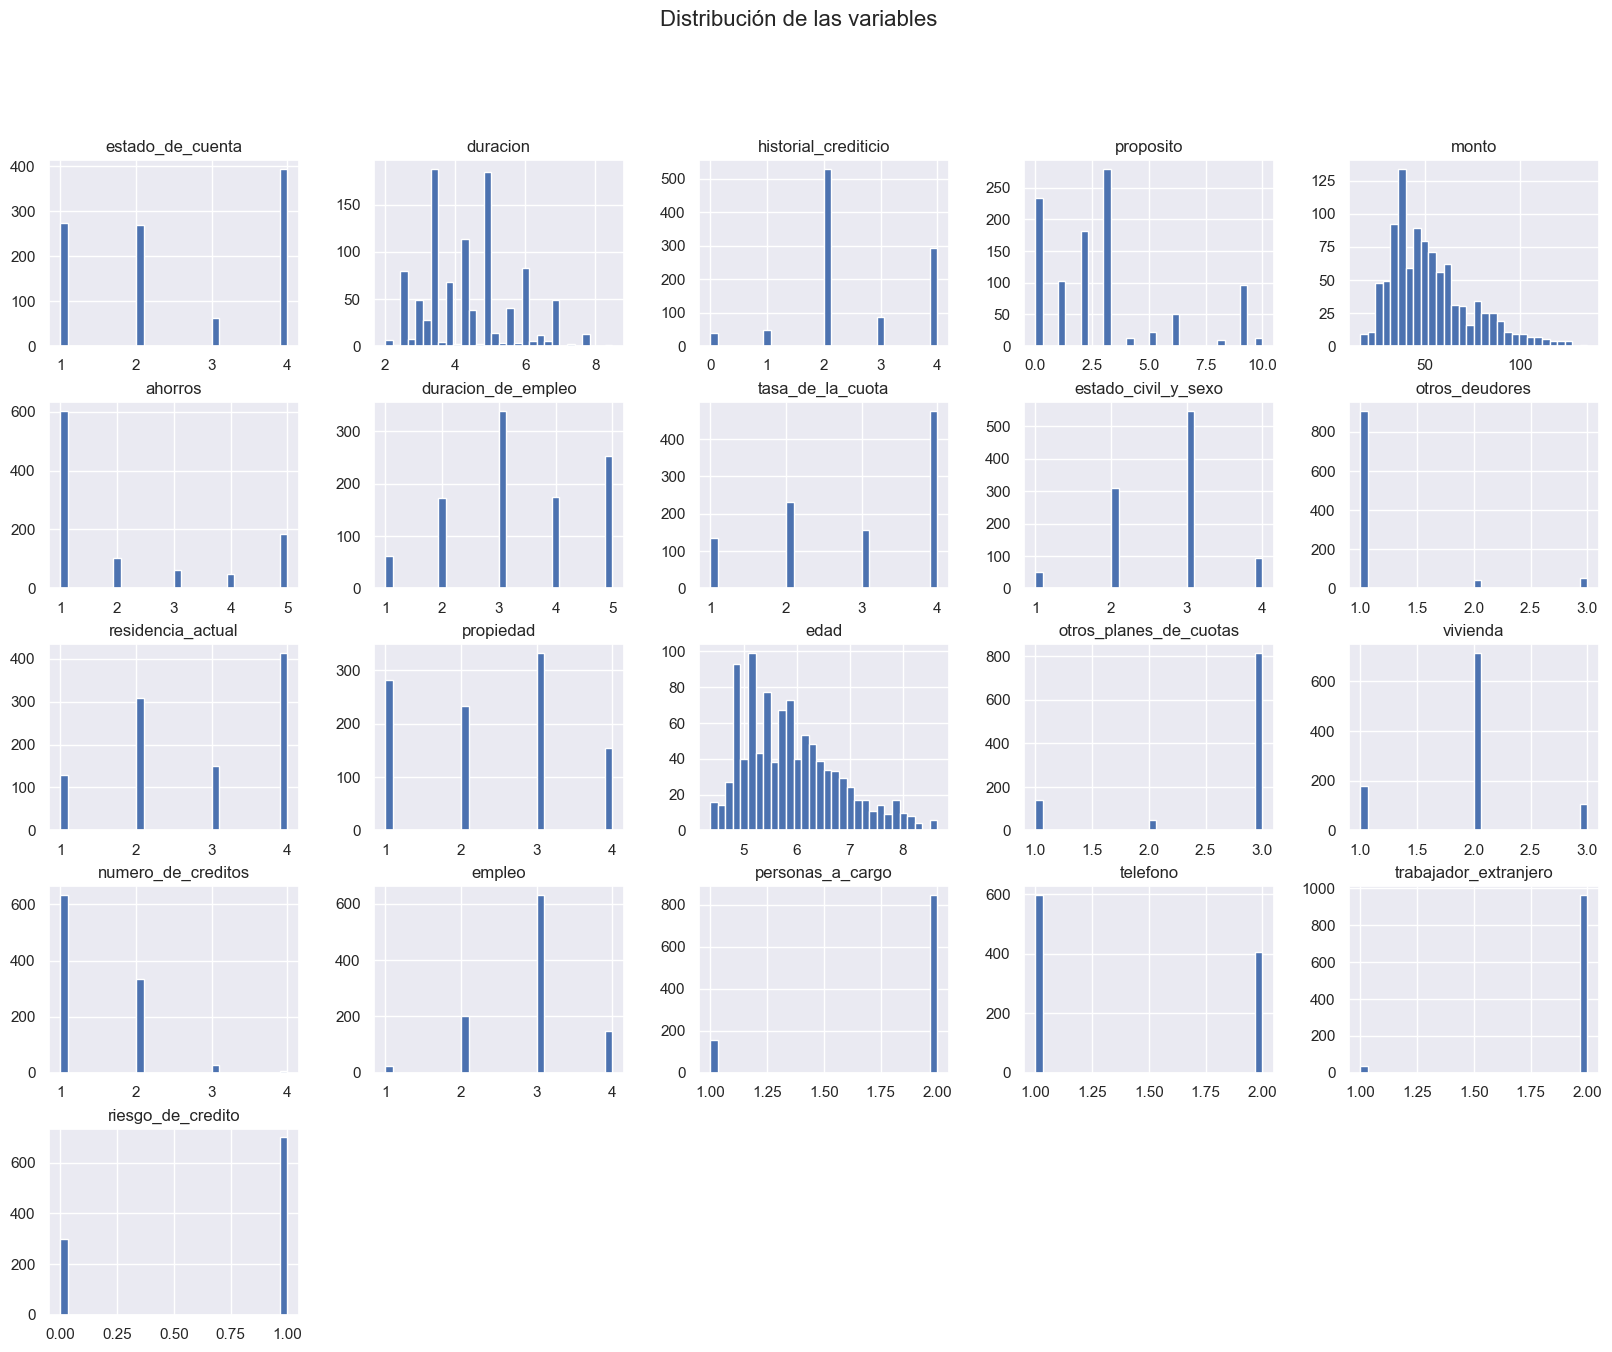

In [251]:
# graficos de barras
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribución de las variables', fontsize=16)
plt.show()

In [252]:
# transformacion de variables ordinales
from sklearn.preprocessing import LabelEncoder

# Crear el LabelEncoder
label_encoder = LabelEncoder()

# Lista de columnas a transformar
label_columns = [
    'ahorros',
    'duracion_de_empleo',
    'tasa_de_la_cuota',
    'residencia_actual',
    'numero_de_creditos'
]

# Aplicar LabelEncoder a las columnas seleccionadas
for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [253]:
# transformacion variables categoricas
import pandas as pd

# Lista de columnas a transformar con One-Hot Encoding
one_hot_columns = [
    'estado_de_cuenta',
    'historial_crediticio',
    'proposito',
    'estado_civil_y_sexo',
    'otros_deudores',
    'propiedad',
    'otros_planes_de_cuotas',
    'vivienda',
    'empleo',
    'personas_a_cargo',
    'telefono',
    'trabajador_extranjero',
    'riesgo_de_credito'
]

# Aplicar One-Hot Encoding usando pd.get_dummies
df = pd.get_dummies(df, columns=one_hot_columns)

In [254]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

# Crear el StandardScaler y MinMaxScaler
scaler = StandardScaler()
# normalizer = MinMaxScaler()

# Lista de columnas a escalar y normalizar
scale_columns = ['duracion', 'monto', 'edad','ahorros',
    'duracion_de_empleo',
    'tasa_de_la_cuota',
    'residencia_actual',
    'numero_de_creditos']

# Aplicar el escalado estándar a las columnas seleccionadas
df[scale_columns] = scaler.fit_transform(df[scale_columns])

# Aplicar la normalización a las columnas ya escaladas
# df[scale_columns] = normalizer.fit_transform(df[scale_columns])

## 3. Modelos

In [255]:
# matriz de valores
x = df.to_numpy()[:, :-1]
clusters = df.to_numpy()[:, -1]

In [256]:
def cluster_ac(x, n_clusters):
    ac = cluster.AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    ac.fit(x)
    return ac.labels_


def cluster_dbscan(x):
    db = cluster.DBSCAN(metric='euclidean', eps=0.4)
    db.fit(x)
    return db.labels_


def cluster_kmeans(x, n_clusters):
    return cluster.k_means(x, n_clusters=n_clusters)[1]

### 3.1 Analisis del numero de clusters

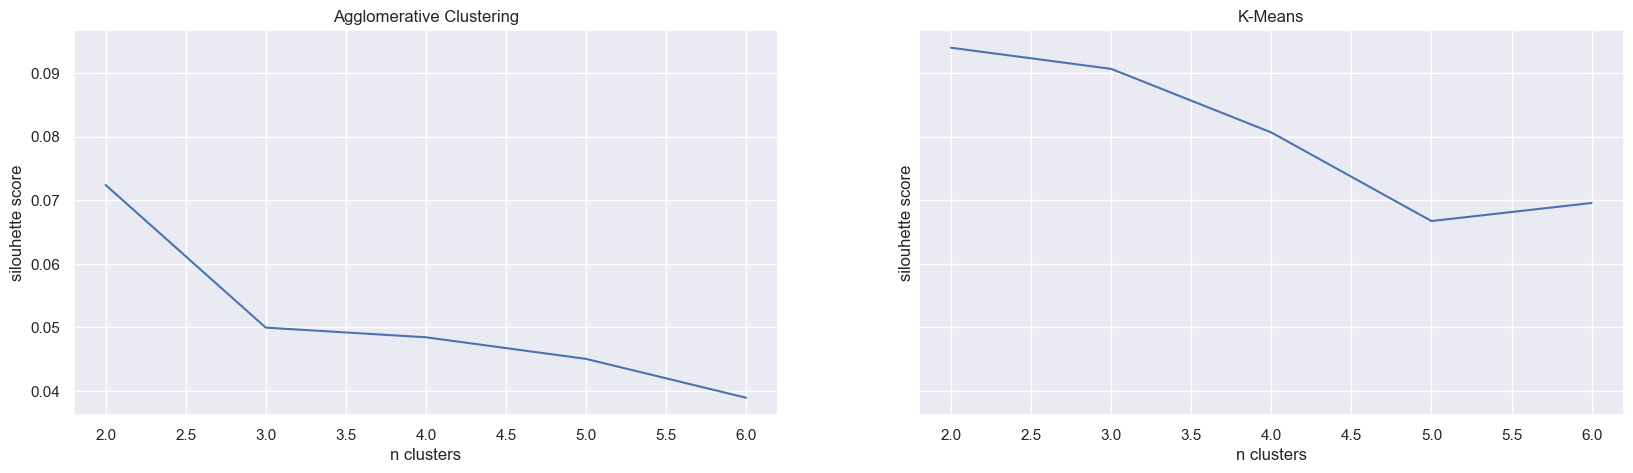

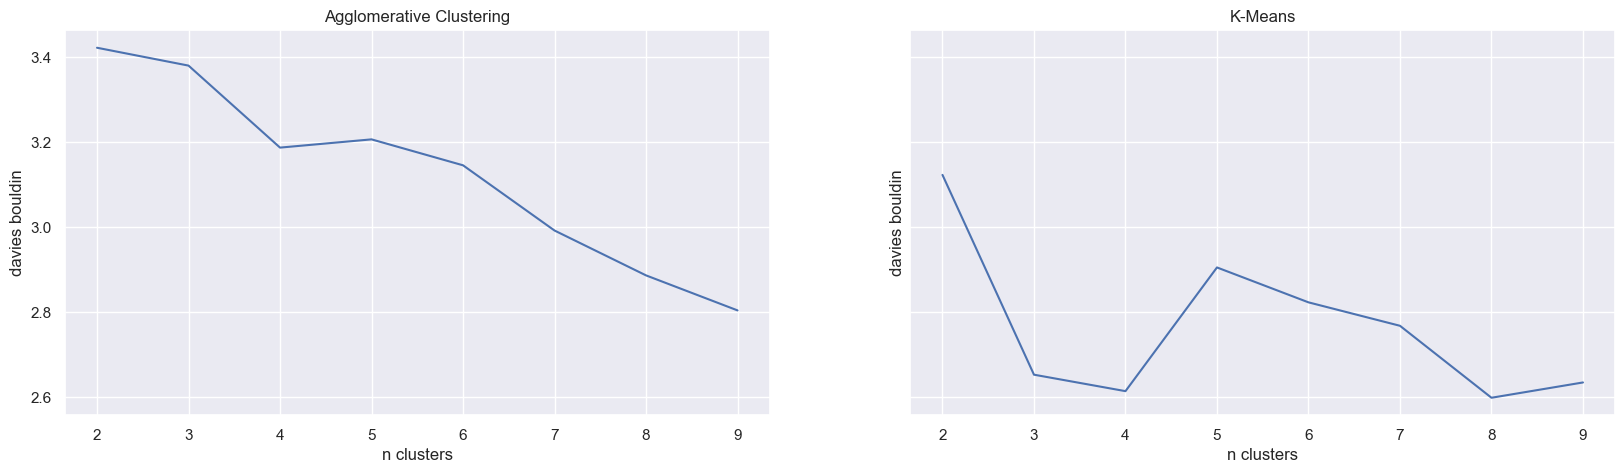

In [257]:
## análisis de número de clusters

### método silhouette
def calcular_silhouette(x):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

    methodos = [cluster_ac, cluster_kmeans]
    for i, m in enumerate(methodos):
        res = []
        for c in range(2, 7):
            res += [silhouette_score(x, m(x, c))]

        ax[i].plot(range(2, 7), res)
        ax[i].set_xlabel("n clusters")
        ax[i].set_ylabel("silouhette score")
        ax[i].set_title('Agglomerative Clustering' if i==0 else "K-Means")


calcular_silhouette(x)

### método davies bouldin
def calcular_davies_bouldin(x):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

    methodos = [cluster_ac, cluster_kmeans]
    for i, m in enumerate(methodos):
        res = []
        for c in range(2, 10):
            res += [davies_bouldin_score(x, m(x, c))]

        ax[i].plot(range(2, 10), res)
        ax[i].set_xlabel("n clusters")
        ax[i].set_ylabel("davies bouldin")
        ax[i].set_title('Agglomerative Clustering' if i==0 else "K-Means")


calcular_davies_bouldin(x)

### 3.2 Reduccion de dimensionalidad

In [258]:
def reducir_dim(x, ndim):
    pca = PCA(n_components=ndim)
    return pca.fit_transform(x)


def reducir_dim_tsne(x, ndim):
    pca = TSNE(n_components=ndim)
    return pca.fit_transform(x)


def reducir_dataset(x, how="original"):
    if how == "pca":
        res = reducir_dim(x, ndim=2)
    elif how == "tsne":
        res = reducir_dim_tsne(x, ndim=2)
    else:
        res = x[:, :2]

    return res


# se ejecutan algoritmos de clusterings con la configuración que le parezca más idónea
clus_ac = cluster_ac(x, 4)
clus_km = cluster_kmeans(x, 4)
clus_db = cluster_dbscan(x)

# se concatenan los resultados en un dataframe
results = pd.DataFrame(np.column_stack([reducir_dataset(x, how="original"), clus_ac, clus_km, clus_db]),
                      columns=["x", "y", "clus_ac", "clus_km", "clus_db"])

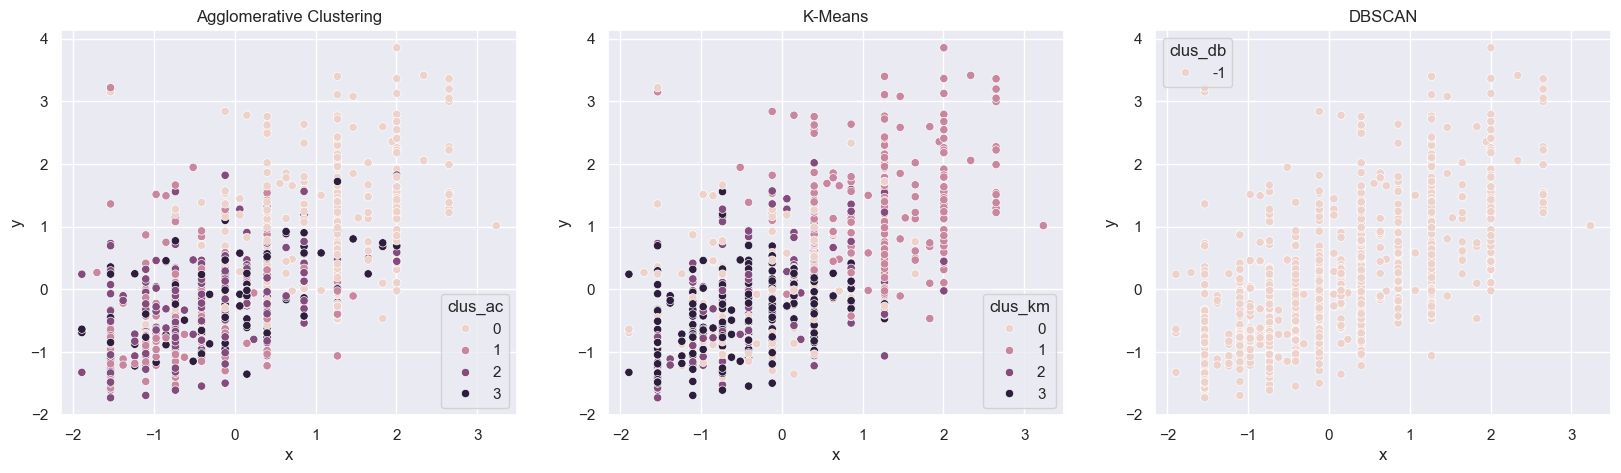

In [259]:
def mostrar_resultados(res):
    """Muestra los resultados de los algoritmos
    """
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))

    sns.scatterplot(data=res, x="x", y="y", hue="clus_ac", ax=ax[0], legend="full")
    ax[0].set_title('Agglomerative Clustering')
    sns.scatterplot(data=res, x="x", y="y", hue="clus_km", ax=ax[1], legend="full")
    ax[1].set_title('K-Means')
    sns.scatterplot(data=res, x="x", y="y", hue="clus_db", ax=ax[2], legend="full")
    ax[2].set_title('DBSCAN')


mostrar_resultados(results)

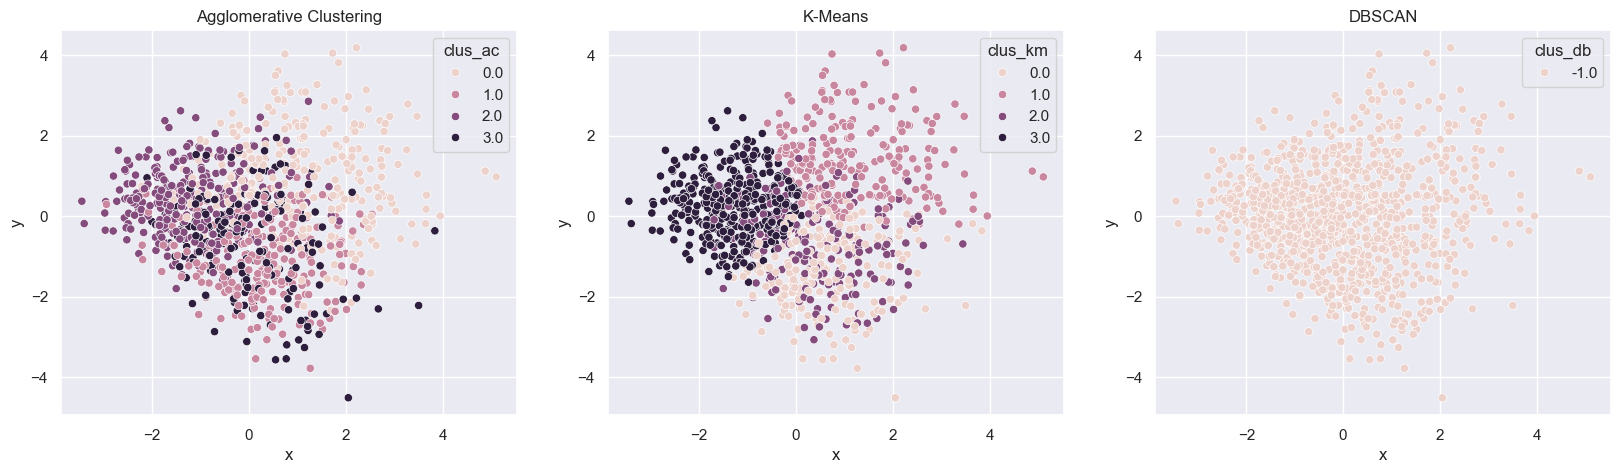

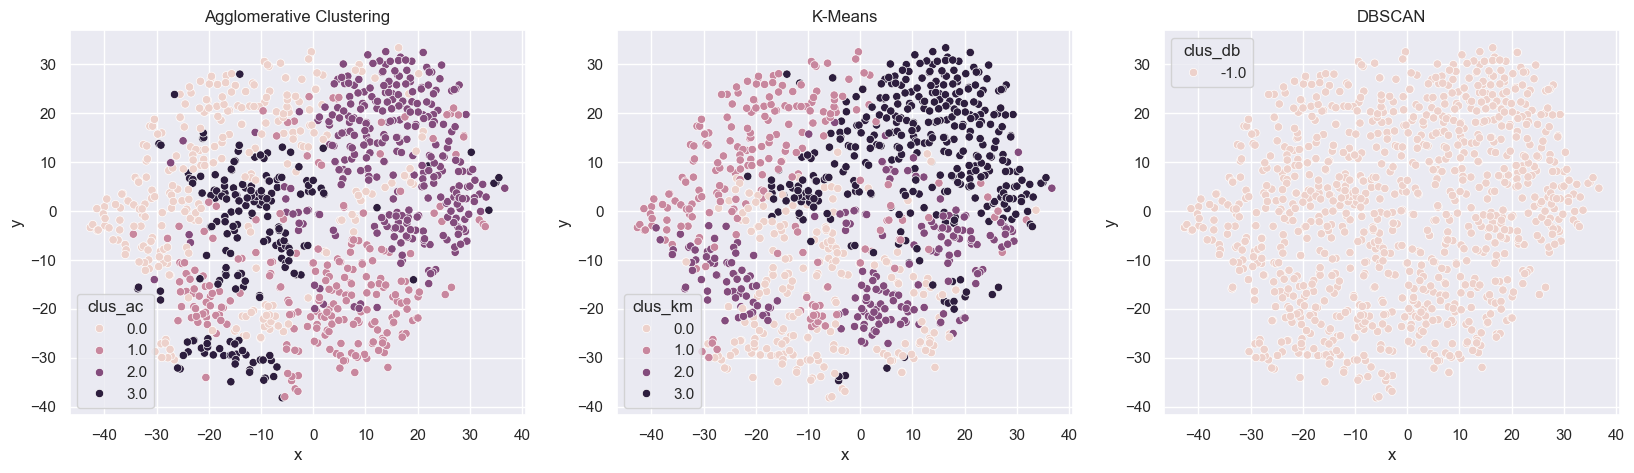

In [260]:
## análisis de dimensionalidad

### pca
results = pd.DataFrame(np.column_stack([reducir_dataset(x, how="pca"), clus_ac, clus_km, clus_db]),
                      columns=["x", "y", "clus_ac", "clus_km", "clus_db"])

mostrar_resultados(results)

### tsne
results = pd.DataFrame(np.column_stack([reducir_dataset(x, how="tsne"), clus_ac, clus_km, clus_db]),
                      columns=["x", "y", "clus_ac", "clus_km", "clus_db"])

mostrar_resultados(results)

## análisis de reducción de dimensionalidad (lineal y no lineal)

### 3.3 Configuracion de hyper-parametros

In [261]:
# evaluacion con grid search
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import pairwise_distances

class AgglomerativeClusteringWrapper(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=2, metric='euclidean', linkage='ward'):
        self.n_clusters = n_clusters
        self.metric = metric
        self.linkage = linkage
        self.model = None

    def fit(self, X, y=None):
        self.model = AgglomerativeClustering(n_clusters=self.n_clusters, metric=self.metric, linkage=self.linkage)
        self.labels_ = self.model.fit_predict(X)
        return self

    def predict(self, X):
        return self.model.fit_predict(X)

# Crear el scorer manualmente
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) < 2:
        return -1  # Si solo hay un cluster, el Silhouette Score es indefinido
    return silhouette_score(X, labels, metric='euclidean')

# Crear el pipeline
agglo_wrapper = AgglomerativeClusteringWrapper()

# Definir los parámetros a explorar
param_grid_agglo = {
    'n_clusters': range(2, 11),
    'metric': ['euclidean'],
    'linkage': ['ward']
}

# Configurar el GridSearchCV
grid_agglo = GridSearchCV(estimator=agglo_wrapper, param_grid=param_grid_agglo, scoring=silhouette_scorer, cv=5)

# Ejecutar el Grid Search
grid_agglo.fit(x)

# Mostrar los mejores parámetros
print("Mejores parámetros para Agglomerative Clustering:")
print(grid_agglo.best_params_)


Mejores parámetros para Agglomerative Clustering:
{'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 2}


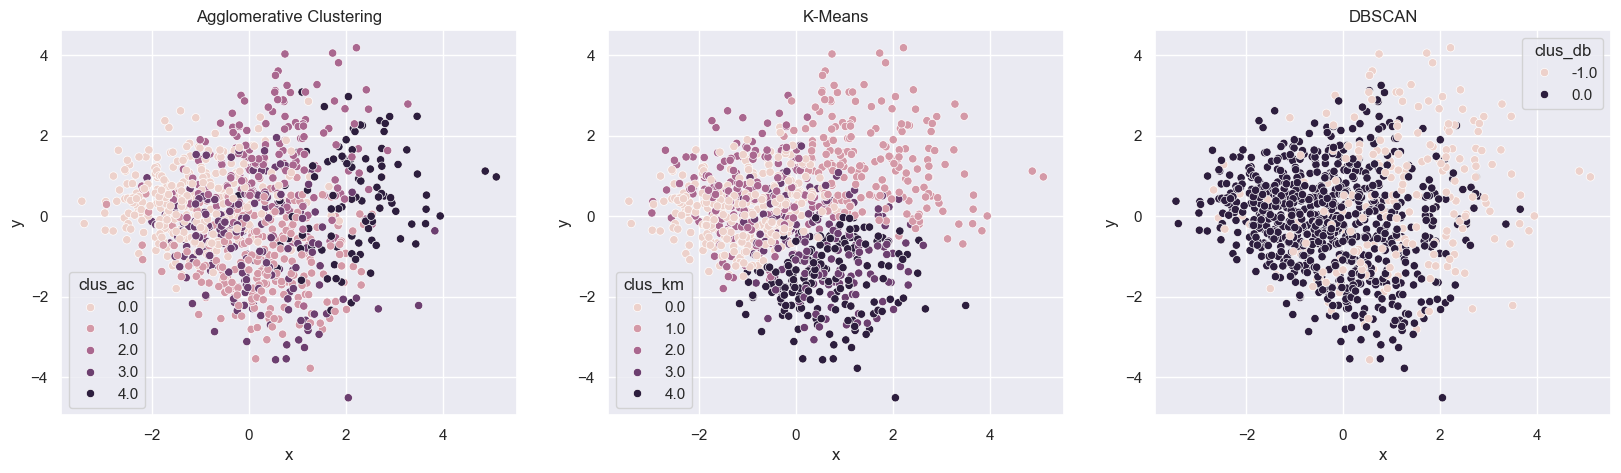

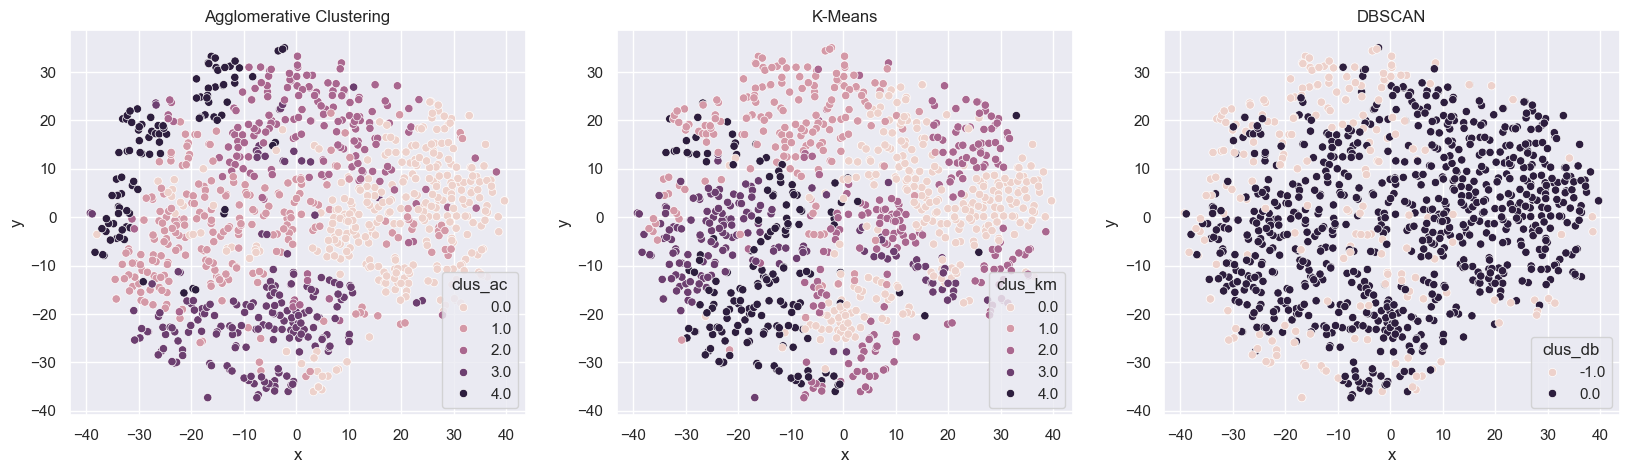

In [262]:
def cluster_ac(x, n_clusters):
    ac = cluster.AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    ac.fit(x)
    return ac.labels_


def cluster_dbscan(x):
    db = cluster.DBSCAN(metric='euclidean', eps=3.28, min_samples=9)
    db.fit(x)
    return db.labels_


def cluster_kmeans(x, n_clusters):
    return cluster.k_means(x, n_clusters=n_clusters)[1]

# se ejecutan algoritmos de clusterings con la configuración que le parezca más idónea
clus_ac = cluster_ac(x, 5)
clus_km = cluster_kmeans(x, 5)
clus_db = cluster_dbscan(x)

# se concatenan los resultados en un dataframe
results = pd.DataFrame(np.column_stack([reducir_dataset(x, how="original"), clus_ac, clus_km, clus_db]),
                      columns=["x", "y", "clus_ac", "clus_km", "clus_db"])

## análisis de dimensionalidad

### pca
results = pd.DataFrame(np.column_stack([reducir_dataset(x, how="pca"), clus_ac, clus_km, clus_db]),
                      columns=["x", "y", "clus_ac", "clus_km", "clus_db"])

mostrar_resultados(results)

### tsne
results = pd.DataFrame(np.column_stack([reducir_dataset(x, how="tsne"), clus_ac, clus_km, clus_db]),
                      columns=["x", "y", "clus_ac", "clus_km", "clus_db"])

mostrar_resultados(results)

## análisis de reducción de dimensionalidad (lineal y no lineal)

### 3.4 Validacion de modelos k-folds

Silhouette scores Agglomerative Clustering: [np.float64(0.05864698562622064), np.float64(0.052646729771357245), np.float64(0.051513150432065516), np.float64(0.03972339712561032), np.float64(0.059417215928717265), np.float64(0.05021990596639636), np.float64(0.06048162370209773), np.float64(0.06711993792074882), np.float64(0.033943366511250156), np.float64(0.04638349060437845)]
Silhouette scores K-Means: [np.float64(0.08154416125525318), np.float64(0.07580557977695443), np.float64(0.0726830510541693), np.float64(0.07295216822305749), np.float64(0.07063025778817981), np.float64(0.0734849191649478), np.float64(0.0817494536724074), np.float64(0.07329450717909426), np.float64(0.06751146908355422), np.float64(0.07893058205304615)]


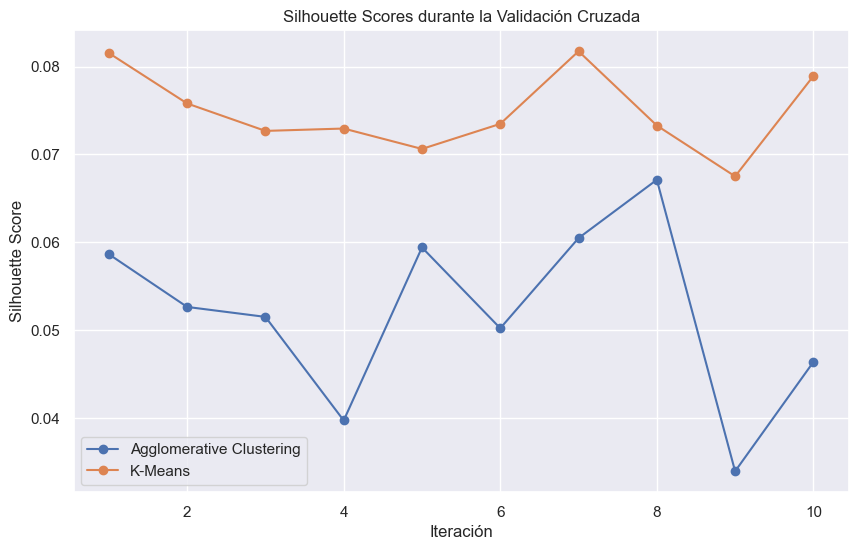

In [263]:
# validacion cruzada de modelos k-means y ac

import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import silhouette_score

# Definir una función para realizar clustering en un re-muestreo
def bootstrap_clustering(x, n_clusters=5, n_iterations=10):
    silhouette_scores_ac = []
    silhouette_scores_km = []

    for i in range(n_iterations):
        # Re-muestrear los datos
        x_resampled = resample(x, n_samples=len(x), random_state=i)

        # Aplicar Agglomerative Clustering
        labels_ac = cluster_ac(x_resampled, n_clusters)
        score_ac = silhouette_score(x_resampled, labels_ac)
        silhouette_scores_ac.append(score_ac)

        # Aplicar K-Means
        labels_km = cluster_kmeans(x_resampled, n_clusters)
        score_km = silhouette_score(x_resampled, labels_km)
        silhouette_scores_km.append(score_km)

    return silhouette_scores_ac, silhouette_scores_km

# Ejecutar la validación cruzada por bootstrap
silhouette_ac, silhouette_km = bootstrap_clustering(x, n_clusters=5, n_iterations=10)

# Mostrar los resultados
print("Silhouette scores Agglomerative Clustering:", silhouette_ac)
print("Silhouette scores K-Means:", silhouette_km)

# Graficar los Silhouette Scores obtenidos durante la validación cruzada
n_iterations = list(range(1, 11))  # Suponiendo 10 iteraciones

plt.figure(figsize=(10, 6))
plt.plot(n_iterations, silhouette_ac, label='Agglomerative Clustering', marker='o')
plt.plot(n_iterations, silhouette_km, label='K-Means', marker='o')
plt.xlabel('Iteración')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores durante la Validación Cruzada')
plt.legend()
plt.show()


### 3.5 Analisis clusters

<Axes: >

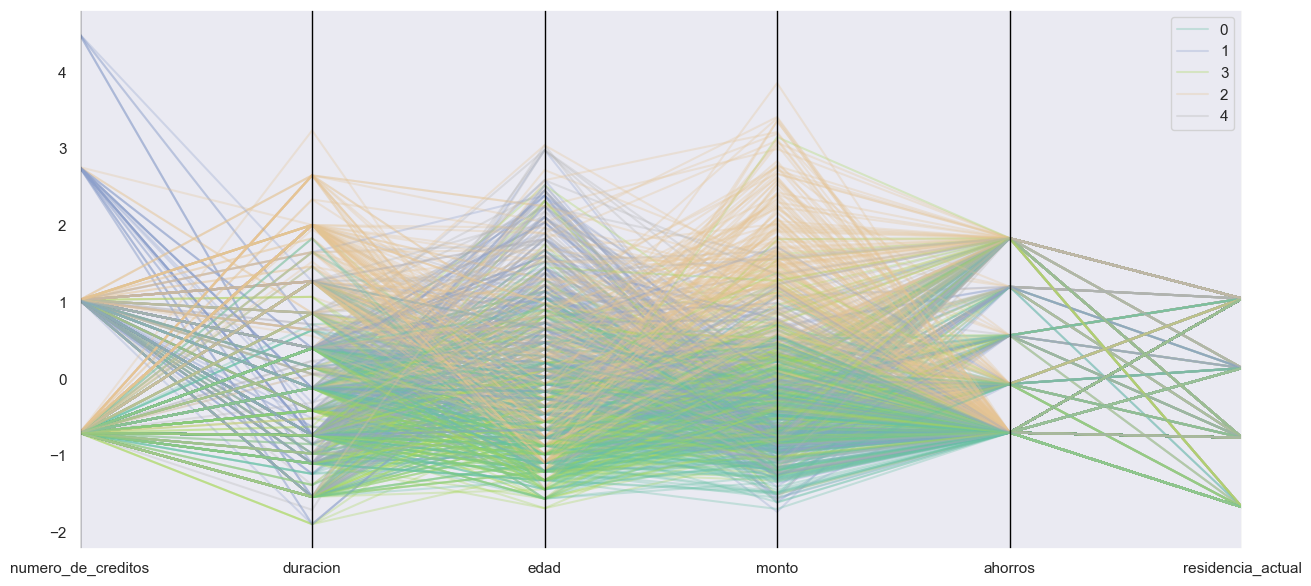

In [290]:
## gráfico de coordenadas paralelas

def crear_ds_cluster(datos, etiquetas):
    ds = np.column_stack([datos, etiquetas])
    return pd.DataFrame(ds)

ds_cluster = crear_ds_cluster(x, cluster_kmeans(x, 5))

ds_cluster.columns = list(df.columns)[:-2] + ["cluster"]

plt.figure(figsize=(15,7))
parallel_coordinates(ds_cluster.iloc[:,[7,0,6,1,2,5,-1]], 'cluster', colormap=plt.get_cmap("Set2"), alpha=0.3)

In [291]:
# estadisticas descriptivas de cada cluster

# Agregar las etiquetas de los clusters al DataFrame original
df['clus_km'] = clus_km

# Calcular estadísticas descriptivas por cluster (K-Means)
estadisticas_km = df.groupby('clus_km').describe()

# Mostrar las estadísticas descriptivas
print("\nEstadísticas descriptivas para cluster (K-Means):")
print(estadisticas_km)



Estadísticas descriptivas para cluster (K-Means):
        duracion                                                              \
           count      mean       std       min       25%       50%       75%   
clus_km                                                                        
0          275.0 -0.195082  0.742667 -1.537716 -0.735231 -0.119463  0.399653   
1          188.0  1.290763  0.799395 -1.537716  0.634695  1.270481  2.004622   
2          206.0 -0.612533  0.719481 -1.893230 -1.102302 -0.735231 -0.119463   
3          161.0  0.052551  0.758816 -1.537716 -0.735231  0.149401  0.399653   
4          170.0 -0.419381  0.768487 -1.893230 -0.973952 -0.735231  0.399653   

                   monto            ...      edad            \
              max  count      mean  ...       75%       max   
clus_km                             ...                       
0        1.830619  275.0 -0.499200  ... -0.162023  1.526292   
1        3.236158  188.0  1.531441  ...  0.668477  3.043